In [ ]:
'''
why BIC over AIC or Pacf?
what exactly is ARIMA doing that ARMA isn't?
    - p: is just lag window for the dependent variable. so if =5 
        then previous 5 terms will act as predictors
    - q: window size for the ma 
    - d: the number of differences. where =0 equal just the previous
    
how to detrend and decompose a time-series?

why did the stationarity fail?
    - overall trend
    - seasonality of weekdays


- fit ma model
- check whether or not the time series is stationary
- decompose/detrend if necessary
    the overall idea behind this is to fit and forecast whatever values 
    after we've adjusted the time-series and the add back the affects 
    of the trend after we've made our forecast.
    
    - random variable transformations
        - log, square/cube root: if we need higher values 
        to be penalized more than smaller vals.
        
    - smoothing: rolling averages, ewma, wma
    - fittin a polynomial regression model
    - 'aggregating':resampling by a larger unit of time i.e. weekly/monthly
    
    - differencing: taking the difference between the data points 
        in the sequence i.e. p_0 - p_1
    - decomposition:
        - hop filter
        - kalman filter
    
    
    -- see if smoothing or aggregating works if not try differencing 
        or decomposition this works better when there's high seasonality.
    
    -- evaluation) 
    why not grid search the values that produce the best RSS?
    Take the original TS and calc the RMSE between the two also plotting them
    to see what the forcast looks like.
    
- fit arma model
    - box jenkins: find p, q s.t. min BIC and AIC DONE
    - there's also pacf and acf methods
- fit arima model: p, q, d s.t. min BIC and AIC * double check
- fit ma model
- fit ar model

- potentially contrive an exmaple anomaly and see how it does

http://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
http://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
https://www.otexts.org/fpp/8/1
http://www-stat.wharton.upenn.edu/~stine/stat910/lectures/08_intro_arma.pdf
file:///Users/ajay/Downloads/Uber_Data_Challenge_StephenSmith_Final.pdf
file:///Users/ajay/Documents/take_homes/Data_Science_Challenge_UBER/Uber!.html
'''



In [1]:
import json
import pandas as pd
import seaborn as sns
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#reading in the json file
df = pd.read_json('logins.json')
df[:3]

,0
0,2012-03-01T00:05:55+00:00
1,2012-03-01T00:06:23+00:00
2,2012-03-01T00:06:52+00:00


In [5]:

df.columns = ['login_date']
df['login_date'] = pd.to_datetime(df['login_date'])
df['count'] = 1
df['hour'] = df['login_date'].apply(lambda x: x.hour)
dayofweek_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
dayofweek_dict = {i : dayofweek_list[i] for i in range(7)}
df['dayofweek'] = df['login_date'].apply(lambda x: dayofweek_dict[x.dayofweek])
df['day'] = df['login_date']

# Not sure of the time difference but I'd simply do this -
# df = df.tshift(3, 'hour') 
df.index = pd.to_datetime(df.login_date)
df.dayofweek.count()
df_hourly = df.groupby('hour')['hour'].count()
df_dayofweek_hourly = df.groupby(['dayofweek','hour'])['hour'].count()

In [8]:
# now constraining by units of time to get a volume figure
ts = df['count']
ts = ts.resample('H',how="sum")
ts

/Users/ajay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  app.launch_new_instance()


login_date
2012-03-01 00:00:00    31.0
2012-03-01 01:00:00    18.0
2012-03-01 02:00:00    37.0
2012-03-01 03:00:00    23.0
2012-03-01 04:00:00    14.0
2012-03-01 05:00:00     8.0
2012-03-01 06:00:00     2.0
2012-03-01 07:00:00     2.0
2012-03-01 08:00:00     1.0
2012-03-01 09:00:00     2.0
2012-03-01 10:00:00     6.0
2012-03-01 11:00:00     7.0
2012-03-01 12:00:00     7.0
2012-03-01 13:00:00     8.0
2012-03-01 14:00:00     7.0
2012-03-01 15:00:00    12.0
2012-03-01 16:00:00     5.0
2012-03-01 17:00:00     8.0
2012-03-01 18:00:00     7.0
2012-03-01 19:00:00    13.0
2012-03-01 20:00:00     6.0
2012-03-01 21:00:00     7.0
2012-03-01 22:00:00    12.0
2012-03-01 23:00:00    25.0
2012-03-02 00:00:00    12.0
2012-03-02 01:00:00    24.0
2012-03-02 02:00:00    25.0
2012-03-02 03:00:00    19.0
2012-03-02 04:00:00    26.0
2012-03-02 05:00:00    16.0
                       ... 
2012-04-29 18:00:00    16.0
2012-04-29 19:00:00    12.0
2012-04-29 20:00:00    11.0
2012-04-29 21:00:00    22.0
2012-04-2

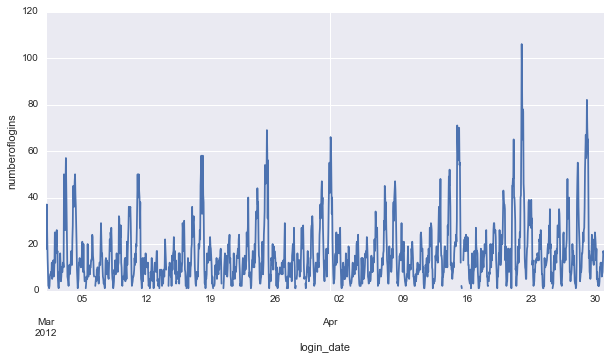

In [10]:
pylab.rcParams['figure.figsize']=(10,5)
ts.plot()
ylabel('numberoflogins');

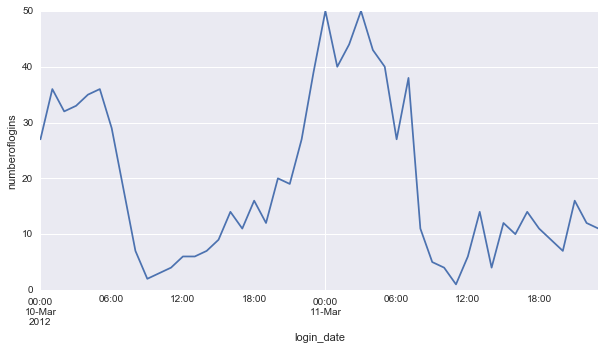

In [12]:
pylab.rcParams['figure.figsize']=(10,5)
ts[(ts.index>='3/10/2012')&(ts.index<'3/12/2012')].plot()
ylabel('numberoflogins');

In [16]:
ts.dropna()

login_date
2012-03-01 00:00:00    31.0
2012-03-01 01:00:00    18.0
2012-03-01 02:00:00    37.0
2012-03-01 03:00:00    23.0
2012-03-01 04:00:00    14.0
2012-03-01 05:00:00     8.0
2012-03-01 06:00:00     2.0
2012-03-01 07:00:00     2.0
2012-03-01 08:00:00     1.0
2012-03-01 09:00:00     2.0
2012-03-01 10:00:00     6.0
2012-03-01 11:00:00     7.0
2012-03-01 12:00:00     7.0
2012-03-01 13:00:00     8.0
2012-03-01 14:00:00     7.0
2012-03-01 15:00:00    12.0
2012-03-01 16:00:00     5.0
2012-03-01 17:00:00     8.0
2012-03-01 18:00:00     7.0
2012-03-01 19:00:00    13.0
2012-03-01 20:00:00     6.0
2012-03-01 21:00:00     7.0
2012-03-01 22:00:00    12.0
2012-03-01 23:00:00    25.0
2012-03-02 00:00:00    12.0
2012-03-02 01:00:00    24.0
2012-03-02 02:00:00    25.0
2012-03-02 03:00:00    19.0
2012-03-02 04:00:00    26.0
2012-03-02 05:00:00    16.0
                       ... 
2012-04-29 18:00:00    16.0
2012-04-29 19:00:00    12.0
2012-04-29 20:00:00    11.0
2012-04-29 21:00:00    22.0
2012-04-2

/Users/ajay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/ajay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


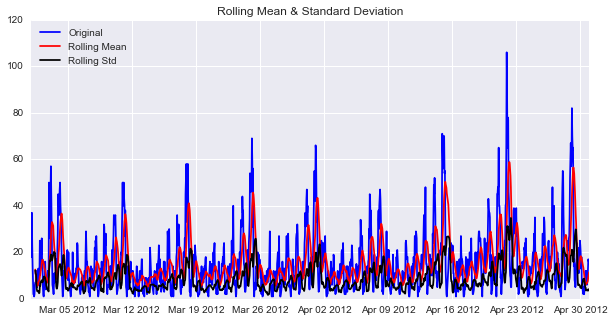

Results of Dickey-Fuller Test:
Test Statistic                   -4.586806
p-value                           0.000137
#Lags Used                       24.000000
Number of Observations Used    1411.000000
Critical Value (5%)              -2.863591
Critical Value (1%)              -3.434993
Critical Value (10%)             -2.567862
dtype: float64


In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    '''
    lotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
    Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.
    '''
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(ts)

fits an MA model along with a Moving std deviation 
model so we can get a visual. We are trying to see 
whether or not its monotonically increasing or decreasing 
as opposed to just staying flat.

remember stationarity means a constant mean and a constant variance/std.
It clearly moves around wildly in the plot above.

step 2. is inspecting the results from the dickey-fuller test. this is a 
test where the null hypothesis is that the TS is non-stationary. So we are l
lookin for the test-statistic to fall below some Critical value threshold.

# Fitting an ARMA model via the Box Jenkin's method

1. BIC picks the true model with probability 1 as
T → ∞
2. AIC picks largers values of
p and
q with positive probability
as
T → 

- fitting the model via box jenkins

In [69]:
import statsmodels.api as sm
from collections import defaultdict

# this number of terms used for the autoregressive window
p_orders = range(5)

# number of terms used for the MA window
q_orders = range(5)

AICs=[]

ts = ts.dropna()

dict_ = defaultdict(list)

for p in p_orders:
    for q in q_orders:

        arma_model = sm.tsa.ARMA(ts, order=(p,q))
        arma_res = arma_model.fit(trend='c', disp=-1)        
        dict_[p].append((q, arma_res.aic))




/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


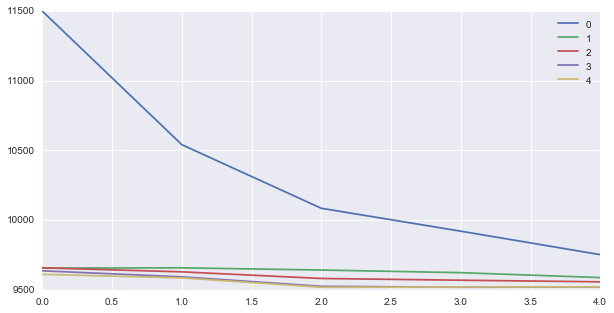

In [70]:

def plot_line(key):
    plt.plot(
            [item[0] for item in dict_[key]], 
            [item[1] for item in dict_[key]],
            label=str(key)
        )
    pass


for line_key in dict_.keys():
    plot_line(line_key)

plt.legend()
plt.show()

In [71]:
# this number of terms used for the autoregressive window
p_orders = range(5)

# number of terms used for the MA window
q_orders = range(5)

AICs=[]

ts = ts.dropna()

dict_ = defaultdict(list)

for p in p_orders:
    for q in q_orders:

        arma_model = sm.tsa.ARMA(ts, order=(p,q))
        arma_res = arma_model.fit(trend='c', disp=-1)        
        dict_[p].append((q, arma_res.bic))


/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/ajay/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


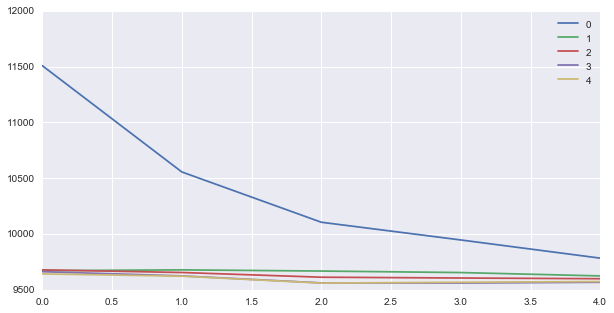

In [72]:
def plot_line(key):
    plt.plot(
            [item[0] for item in dict_[key]], 
            [item[1] for item in dict_[key]],
            label=str(key)
        )
    pass


for line_key in dict_.keys():
    plot_line(line_key)

plt.legend()
plt.show()